# Week 5 - Data Collection

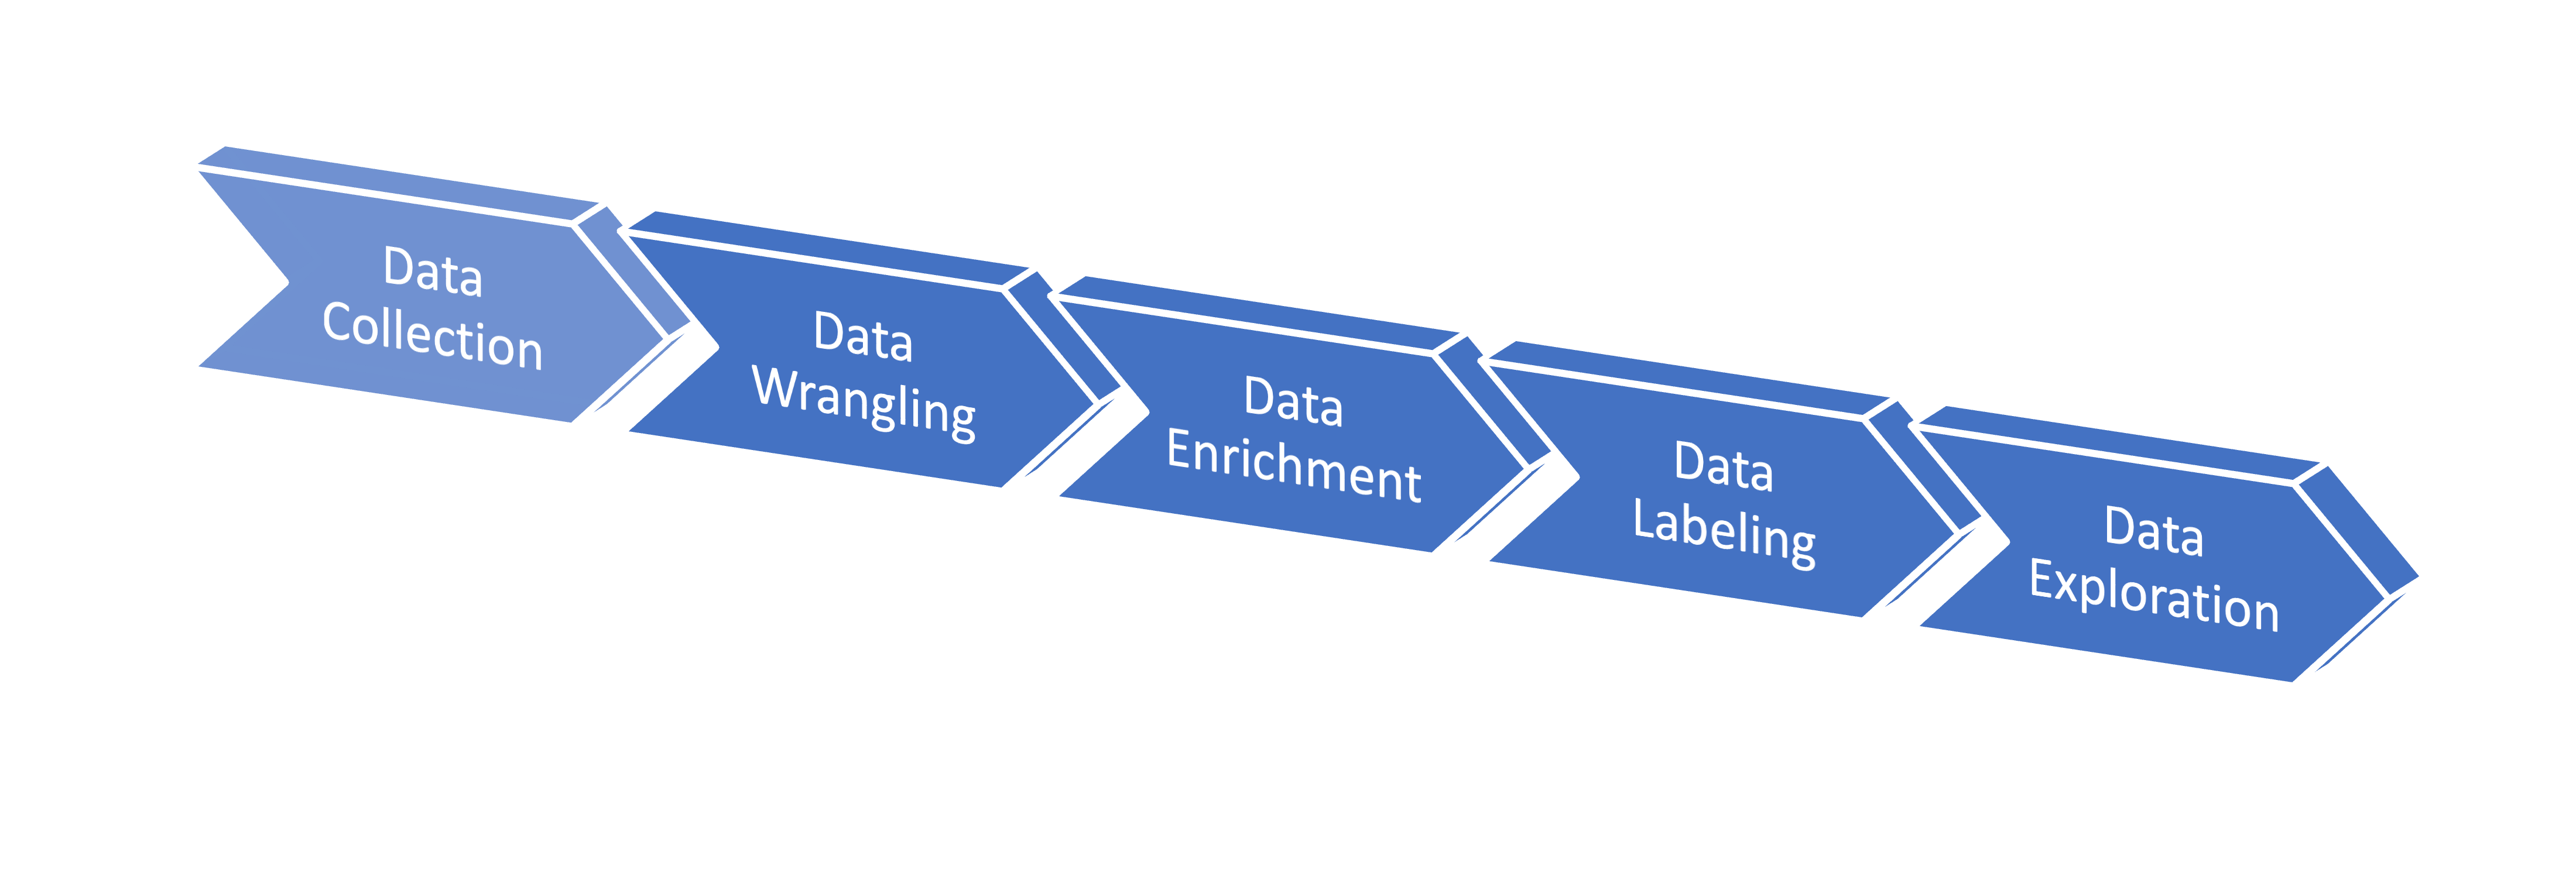

##  Table of Contents

- Theoretical Overview
- Problem Statement
- Code
    1. Adding knowledge base to your chatbot
        - Importing libraries
        - Data collection
        - Preprocessing data
    2. Get your chatbot to say its first words
    3. Test your clever chatbot!

## Theoretical Overview 

Data collection is the process of gathering information from various sources for analysis and storage. Web scraping is a specific form of data collection that involves extracting information from websites. The process involves sending HTTP requests to a website's server, downloading the HTML content, and parsing the data of interest. This is achieved with the help of web scraping softwares or with programming language libraries. The extracted information can be text data that can be used for natural language processing purposes, image data or tabular data that can be used for general machine learning purposes. It remains a valuable tool for data collection.

## Problem Statement

This activity will include web scraping techniques for Data Collection. In this activity, you will have to scrape the text data from a Wikipedia page. Then, you are required to create a chatbot using the cosine similarity algorithm. You have to create a chatbot which will recognise certain input and reply it with a response that makes sense. <br> This exercise is inspired by the [great work](https://medium.com/analytics-vidhya/building-a-simple-chatbot-in-python-using-nltk-7c8c8215ac6e) by Parul Pandey.

## Code

## 1. Adding knowledge base to your chatbot

Your chatbot's ability to converse and interact depends on the data that you input to it. Therefore, the first step you want to do is to plan your chatbot. You will have to choose the right knowledge base for your particular task. For instance, you would not train your chatbot on movie reviews if you want it to answer questions about sports cars!

In this exercise, you will decide what you want your chatbot to have knowledge on, and look for webpages required to build a dataset. 

To start off, we will collect the raw text data from Wikipedia on Chatbots. The processed data have been stored in a text document file called robots.txt.
  
What questions would you like your chatbot to answer? You could train your chatbot on endangered species, hunger, gender equality, clean energy, or any other topic you would like! Use the tools you have learned from the previous Experiences to collect information, and process it into a corpus of knowledge.  

### Importing libraries

In this exercise, we will be requiring the following libraries:

In [3]:
# Import packages
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import numpy as np # to represent corpus as arrays
import random 
import string # to process standard python strings
from sklearn.metrics.pairwise import cosine_similarity # We will use this later to decide how similar two sentences are
from sklearn.feature_extraction.text import TfidfVectorizer # Remember when you built a function to create a tfidf bag of words in Experience 2? This function does the same thing!
import nltk # to process text data

### Data Collection

### Specify url of the web page as the source
We will specify the required webpage url, where we collect the data from

In [4]:
source = urlopen('https://en.wikipedia.org/wiki/Chatbot').read()

### Initiating BeautifulSoup
We will initiate and create an instance of BeautifulSoup

In [5]:
soup = BeautifulSoup(source,'lxml')
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Chatbot - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"2415fe3d-30b8-423b-875c-85794084fed8","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Chatbot","wgTitle":"Chatbot","wgCurRevisionId":1135577018,"wgRevisionId":1135577018,"wgArticleId":148349,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Articles with short description","Short description is different from Wikidata","Commons category link from Wikidata","Articles with GND id

### Text extraction
We will extract the plain text content from paragraphs

In [6]:
paras = []
for paragraph in soup.find_all('p'):
    paras.append(str(paragraph.text))

We will extract text from paragraph headers

In [7]:
heads = []
for head in soup.find_all('span', attrs={'mw-headline'}):
    heads.append(str(head.text))

### Interleaving the paragraphs and headers

In [8]:
# Interleave paragraphs & headers
text = [val for pair in zip(paras, heads) for val in pair]
text = ' '.join(text)

### Superscript edit
We will drop footnote superscripts in brackets

In [9]:
text = re.sub(r"\[.*?\]+", '', text)

### Trimming the text and replacing new lines
We will replace '\n' (a new line) with '' and trim the unwanted text from both the ends

In [10]:
text = text.replace('\n', '')[55:-15]

In [11]:
text

'A chatbot or chatterbot is a software application used to conduct an online chat conversation via text or text-to-speech, in lieu of providing direct contact with a live human agent. Designed to convincingly simulate the way a human would behave as a conversational partner, chatbot systems typically require continuous tuning and testing, and many in production remain unable to adequately converse, while none of them can pass the standard Turing test. The term "ChatterBot" was originally coined by Michael Mauldin (creator of the first Verbot) in 1994 to describe these conversational programs. Development Chatbots are used in dialog systems for various purposes including customer service, request routing, or information gathering. While some chatbot applications use extensive word-classification processes, natural-language processors, and sophisticated AI, others simply scan for general keywords and generate responses using common phrases obtained from an associated library or database.

- **We have successfully scraped the text data from Wikipedia. Let us move on with the preprocessing part.**

### Processing data

Now we begin to process the knowledge base. We will read the text file, convert everything to lowercase and tokenize it. Do you remember what tokenization does?  
  
There exists pre-trained tokenizers that will help split your document up into tokens. 

If this is the first time you are using these pre-trained tokenizers, you will have to download it with the command `nltk.download('punkt')`. We will also use a pre-defined model to perform lemmatization. This is downloaded using `nltk.download('wordnet')`. Subsequently, you can comment out the line if you ever have to run the cell again.

**Optional: run these if you do not have the required functions**

In [12]:
nltk.download('punkt') # first-time use only tokenizer
nltk.download('wordnet') # first-time use only Used for the lemmatizer

[nltk_data] Downloading package punkt to /Users/midhu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /Users/midhu/nltk_data...


True

### Conversion to lower case

We will convert all text to lower case first. Remember to inspect the result once we are done.

In [7]:
#your code here


chatbot
from wikipedia, the free encyclopedia
jump to navigationjump to search
a chatbot (also known as a smartbot, talkbot, chatterbot, bot, im bot, interactive agent, conversational interface or artificial conversational entity) is a computer program or an artificial intelligence which conducts a conversation via auditory or textual methods.[1] such programs are often designed to convincingly simulate how a human would behave as a conversational partner, thereby passing the turing test. chatbots are typically used in dialog systems for various practical purposes including customer service or information acquisition. some chatbots use sophisticated natural language processing systems, but many simpler ones scan for keywords within the input, then pull a reply with the most matching keywords, or the most similar wording pattern, from a database.

the term "chatterbot" was originally coined by michael mauldin (creator of the first verbot, julia) in 1994 to describe these conversational

### Sentence segmentation

We will use the funtion .sent_tokenizer to convert documents into a list of sentences.

In [8]:
#your code here

['\nchatbot\nfrom wikipedia, the free encyclopedia\njump to navigationjump to search\na chatbot (also known as a smartbot, talkbot, chatterbot, bot, im bot, interactive agent, conversational interface or artificial conversational entity) is a computer program or an artificial intelligence which conducts a conversation via auditory or textual methods.', '[1] such programs are often designed to convincingly simulate how a human would behave as a conversational partner, thereby passing the turing test.', 'chatbots are typically used in dialog systems for various practical purposes including customer service or information acquisition.', 'some chatbots use sophisticated natural language processing systems, but many simpler ones scan for keywords within the input, then pull a reply with the most matching keywords, or the most similar wording pattern, from a database.', 'the term "chatterbot" was originally coined by michael mauldin (creator of the first verbot, julia) in 1994 to describe th

Great! You have separated the document into sentences. However, notice that it is difficult to decipher the individual sentence now.

**Task: Print every sentence in a new line!**

This way, it will be easier to read the sentences!

Use the link [here](https://www.geeksforgeeks.org/print-lists-in-python-4-different-ways/) to learn how to do that!

In [9]:
#your code here

printing lists in new line

chatbot
from wikipedia, the free encyclopedia
jump to navigationjump to search
a chatbot (also known as a smartbot, talkbot, chatterbot, bot, im bot, interactive agent, conversational interface or artificial conversational entity) is a computer program or an artificial intelligence which conducts a conversation via auditory or textual methods.
[1] such programs are often designed to convincingly simulate how a human would behave as a conversational partner, thereby passing the turing test.
chatbots are typically used in dialog systems for various practical purposes including customer service or information acquisition.
some chatbots use sophisticated natural language processing systems, but many simpler ones scan for keywords within the input, then pull a reply with the most matching keywords, or the most similar wording pattern, from a database.
the term "chatterbot" was originally coined by michael mauldin (creator of the first verbot, julia) in 1994 to de

### Word tokenization

We will use the funtion .word_tokenizer to convert sentences into a list of words.

In [10]:
#your code here

['chatbot', 'from', 'wikipedia', ',', 'the', 'free', 'encyclopedia', 'jump', 'to', 'navigationjump', 'to', 'search', 'a', 'chatbot', '(', 'also', 'known', 'as', 'a', 'smartbot', ',', 'talkbot', ',', 'chatterbot', ',', 'bot', ',', 'im', 'bot', ',', 'interactive', 'agent', ',', 'conversational', 'interface', 'or', 'artificial', 'conversational', 'entity', ')', 'is', 'a', 'computer', 'program', 'or', 'an', 'artificial', 'intelligence', 'which', 'conducts', 'a', 'conversation', 'via', 'auditory', 'or', 'textual', 'methods', '.', '[', '1', ']', 'such', 'programs', 'are', 'often', 'designed', 'to', 'convincingly', 'simulate', 'how', 'a', 'human', 'would', 'behave', 'as', 'a', 'conversational', 'partner', ',', 'thereby', 'passing', 'the', 'turing', 'test', '.', 'chatbots', 'are', 'typically', 'used', 'in', 'dialog', 'systems', 'for', 'various', 'practical', 'purposes', 'including', 'customer', 'service', 'or', 'information', 'acquisition', '.', 'some', 'chatbots', 'use', 'sophisticated', 'nat

Now we have our tokens!

It is useful to inspect our tokens to make sure they look as expected, and to make sure that we have enough information to train our chatbot. Each sentence token can be considered one piece of knowledge as they provide a single piece of information about your knowledge base. The size of your knowledge base will determine how capable your chatbot will be. 

The code to print the lengths of your sentence and word tokens are below.

In [11]:
# Use this to check the size of your knowledge base. There should be at least 150 sentence tokens, and if possible, up to 1000
# to provide enough context for your chatbot.

#your code here

184 3667


Great job! we now have an idea of the amount of information passed to our chatbot. If you find that you do not have enough sentence tokens, this is the time to go back out and search for more information!  
  
### Lemmatization 

We will lemmatize our word tokens using the WordNetLemmatizer that we have downloaded.

In [12]:
lemmer = nltk.stem.WordNetLemmatizer() #Initiate lemmer class. WordNet is a semantically-oriented dictionary of English included in NLTK.
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

### Normalization

We also write functions to remove punctuation since that will not be useful for our knowledge base.

In [13]:
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict))) #see previous section 1.2.5 lemmatization

Time to see how these functions work! call the function on the following sentence and print the output. What has our function done to the test sentence?

In [10]:
test_sentence='Today was a wonderful day. The sun was shining so brightly and the birds were chirping loudly!'
test_word_tokens = nltk.word_tokenize(#your code here)# converts documents to list of words

lemmer = nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

LemTokens(#your code here)

['Today',
 'wa',
 'a',
 'wonderful',
 'day',
 '.',
 'The',
 'sun',
 'wa',
 'shining',
 'so',
 'brightly',
 'and',
 'the',
 'bird',
 'were',
 'chirping',
 'loudly',
 '!']

## 2. Matching topics with cosine similarity

Congratulations, you have now converted your knowledge database from text into sentences and tokens! Do you remember what is the next step after this? Computers are good at processing numbers, and therefore, we will next convert our tokens into numbers!

To do so, we will revisit the bag of words and tf-idf from acquire stage and experience 2.

How does having our document vector help us to create our chatbot?  

**How would computer finds similarity?**

Suppose you want to create a chatbot that can read your input, 'considers' what your input is talking about, and then respond with something that makes the most sense. One of the most common ways is by taking the question, and looking for information within the dataset that is very similar to our question. For example, if the questions contains the phrase 'computer failure', we will assume that the answer lies in sentences that contains words similar to 'computer failure' like 'computer crash', or 'hardware failure'. 

**What is [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity)?**

Remember that we will convert our dataset into document vectors? cosine similarity allows us to find similar vectors, and these vectors will be assumed to be similar in meaning. 

**Let us work through an example below!**

**Dataset**

Here, we have 3 sentences. The first 2 are our mini knowledge base, while the third one is our sample question. We will process them into document vectors, and then use cosine similarity to see which one of the knowledge base can give us better answer to the question!

In [14]:
# Let us take two sentences to be the knowledge base, and one more which is a question.
Sentence_1='John is my father'
Sentence_2='Jane is my mother'
Question='who is my father'

### Vocabulary

The vocabulary is a list of all the words that exist in our sentence and questions.   

**Task: List down the vocabulary included in the dataset**

In [15]:
Vocabulary = ['John', 'is', 'my', 'father', 'Jane', 'mother', 'who']

### Bag of words

How would we put this into a bag of words? 

**Task: Construct an array to represent the information from the two sentences above using a bag of words technique**

Hint 1: The array should be of size (3,7), and each number within the array is either 0 or 1 to indicate the presence of that word in the row.  
Hint 2: An array is constructed using the function array_name = np.array([[row 1],[row 2],[row 3]])

In [16]:
# bag_of_words = # your code here

In your bag of words, the first 2 rows encode all your knowledge that is contained in sentence 1 and sentence 2. The third row encodes your question.  
To find the piece of knowledge closest to your question, we simply look for the sentence with the highest cosine similarity to your question.  

**Finding cosine similarity**

Remember at the beginning of the exercise when we imported all our libraries? One of the libraries was called `from sklearn.metrics.pairwise import cosine_similarity`. The cosine_similarity function allows us to compare sentences. Imagine each sentence as a vector, which is a line pointing in some direction. Cosine similarity calculates the angles between each line and the more similar two lines are, the smaller their angle, and the higher their cosine similarity.  
  
Let us calculate the cosine similarities between each piece of information in our knowledge base, and the question. Remember the first row of our array corresponds to sentence 1, and the second row corresponds to sentence 2. Let us see which sentence has a higher cosine similarity to the question!

**Task: Use indexing function to select only the top 2 rows of bag of words**

In [17]:
bag_of_words[#your code here]

array([[1, 1, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 1, 1, 0]])

Great, you have your database selected, now we want to list the question which is at the last row of the variable bag_of_words:

In [ ]:
print (bag_of_words[-1,:].reshape(1, -1))

In [18]:
print (bag_of_words[-1,:])

[[0 1 1 1 0 0 1]]
[0 1 1 1 0 0 1]


What is the difference between the 2 output above? Try using the lines for the cosine simililarity exercise below

We are now ready to apply the cosine similarity

In [19]:
# Remember our database
# Sentence_1='John is my father'
# Sentence_2='Jane is my mother'
# Question='who is my father'

cosine_similarity(bag_of_words[:2,:], # your code here)

array([[0.75],
       [0.5 ]])

### Now, analyze the result!

Which sentence had a higher cosine similarity, and was it the answer you expected? 

If you got your chatbot to return the sentence with the highest cosine similarity score as the answer, would it have answered the question correctly? That is basically how a chatbot answers questions!  
  
**Task: Now, can you think of a question which would cause sentence 2 to have a higher cosine similarity? Show us the score!**

In [20]:
# Your code here
# Suggest an update to the initial sentences and the resulting bag of words.

cosine_similarity(bag_of_words[:2,:], bag_of_words[-1,:].reshape(1, -1))

array([[0.5 ],
       [0.75]])

Congratulations! Now that your chatbot has brains, let us give it a mouth!

## 3. Get your chatbot to say its first words

### Greetings
At the start of every conversation, your chatbot may expect a greeting. These greetings are not a question, but your chatbot should have a reply to the greeting too. We can input some common greetings you expect to receive, and get your chatbot to reply with a random selection of greeting responses.  
   
Tip: Your chatbot may throw up some warnings. Do not worry about those as long as your chatbot is giving you reasonable answers.

### Create list of inputs and responses

Let's first create the list of greetings your chatbot will have

In [21]:
GREETING_INPUTS = ["hello", "hi", "greetings", "sup", "what's up","hey", "hey there"]
GREETING_RESPONSES = ["hi", "hey", "*nods*", "hi there", "hello", "I am glad! You are talking to me"]

**Task: Add some greeting inputs and responses to personalize your chatbot**

In [ ]:
# Your code here

### Create function to receive and return greetings

In [19]:
def greeting(sentence):
    for word in sentence.split(): # Looks at each word in your sentence
        if word.lower() in GREETING_INPUTS: # checks if the word matches a GREETING_INPUT
            return random.choice(GREETING_RESPONSES) # replies with a GREETING_RESPONSE

Let's test this out! type different types of greetings into the chatbot and see how it responds. Run the greeting a few different times. Do you get the same answer each time?  
Hint: pressing ctrl-enter allows you to run the highlighted cell. Holding ctrl and pressing enter multiple times allows you to run the same cell repeatedly.

In [20]:
# Your code here

'hi there'

### Create function to receive questions and return answers

Now let us define a function to calculate a response when someone asks the robot a question. 

The response function:
1. Takes in a question
2. Uses cosine similarity to find the closest sentence to the question
3. Returns that sentence as an answer

To prevent the chatbot from returning completely useless answers, we will only return an answer if it has a cosine similarity greater than 0. Otherise, the chatbot will simply say that it does not understand the question.

**Note:** The Chatbot is using TFIDF to vectorize our dataset. To learn more about TFIDF click [here](https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/)

In [106]:
def response(user_response):
    
    robo_response='' # initialize a variable to contain string
    sent_tokens.append(user_response) #add user response to sent_tokens
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english') 
    tfidf = TfidfVec.fit_transform(sent_tokens) #get tfidf value
    vals = cosine_similarity(tfidf[-1], tfidf) #get cosine similarity value
    idx=vals.argsort()[0][-2] 
    flat = vals.flatten() 
    flat.sort() #sort in ascending order
    req_tfidf = flat[-2] 
    
    if(req_tfidf==0):
        robo_response=robo_response+"I am sorry! I don't understand you"
        return robo_response
    else:
        robo_response = robo_response+sent_tokens[idx]
        return robo_response

### Testing the response function

Test the response function. Write some questions into the response() function and inspect the results. Are they close to the answers? 

If you constantly get the response 'I'm sorry! I don't understand you', you might need to add more information into your knowledge base.

In [107]:
# Your code here

C:\ProgramData\Anaconda3\envs\data_idp3e\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


'what do chatbots do'

### Adding more information into knowledge base

You can add more information into your knowledge base either by hand, for specific answers you have, or by searching for and adding more data into the text file!

## 4. Test your clever chatbot!

### Testing your chatbot
Now it is time to test your chatbot. This chatbot will be run entirely inside your jupyter notebook. You can train your chatbot to do specific tasks on commands. 

For instance:
1. Saying 'bye' will cause the chatbot to shutdown. 
2. Giving a response that is one of the greeting phrases will cause the chatbot to give a greeting in return.   

You can add more features to your chatbot based on a list of keywords that triggers a certain behavior. For example, you can get your chatbot to tell the time, to tell a joke, or even print pictures.
  
Your basic chatbot is written below. You can play with it to see how well it can understand questions in your knowledge base. It will not be able to answer questions very well because chatbots require many thousands of sentences which takes many days to train. It should still be able to answer simple questions!  

**Adding time features to your chatbot**

You will now add more features to your chatbot to improve its capabilities! For a start, add a feature to your chatbot that will allow it to tell you the time if the user inputs 'time'.  
Hint: Use a similar template to the greeting function above. You can get the current time by importing datetime and calling datetime.datetime.now().

In [39]:
import datetime

def tell_time(sentence):
    for word in sentence.split():
        # your code here
            currentdt = datetime.datetime.now()
            return currentdt.strftime("%Y-%m-%d %H:%M:%S")

tell_time('time')

'2019-01-20 13:47:28'

### Test your chatbot now!

In [68]:
flag=True
print("ROBO: My name is Robo. I will answer your queries about Chatbots. If you want to exit, type Bye!")
while(flag==True):
    user_response = input()
    user_response=user_response.lower()
    if(user_response!='bye'):
        if(user_response=='thanks' or user_response=='thank you' ):
            flag=False
            print("ROBO: You are welcome..")
        else:
            if(greeting(user_response)!=None):
                print("ROBO: "+greeting(user_response))
                # Uncomment the statement below once you have written your tell_time fuction.
#             if(tell_time(user_response)!=None):
#                 print("ROBO: "+tell_time(user_response))
            else:
                print("ROBO: ",end="")
                print(response(user_response))
                sent_tokens.remove(user_response)
    else:
        flag=False
        print("ROBO: Bye! take care..")

ROBO: My name is Robo. I will answer your queries about Chatbots. If you want to exit, type Bye!
bye
ROBO: Bye! take care..


Now you have a very basic chatbot that can be trained on data you have chosen. Improve your chatbot in the following ways:
1. increase the number of greeting inputs and greeting responses
2. increase the number of words to say goodbye i.e. see you!, quit, exit
3. train your chatbot on a different topic, or add to your chatbot's knowledge base by adding more data